## Introduction ##
Music has been soething that has been changing for decades. We wanted to analyze and visualize the changes in music using the Spotify API. 

### Getting Started ###
First, we needed to import the necessary resources from python to be able to read and display the data from the Spotify API. There is a spotify library for python called spotipy, but we realized that there was not huge benefit from using that library instead of just using requests and get calls to the API endpoint. We also needed to get a token for the authentication to be able to used the API.

In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import sys
import string
!{sys.executable} -m pip install Pillow
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install -U nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')


# https://developer.spotify.com/console/get-playlist-tracks/?playlist_id=37i9dQZF1DX5Ejj0EkURtP&market=&fields=&limit=&offset= 
# use above website to generate token
token = "BQDxOjv-PfTgMO9e7ko4yz-ohdCvKpHWu-s92LJoffFdshpHK_AiouRuYCa4ja70Qz-9ErbnZ69AojQsREBdLc6LXePQ3oSsMvfDmfxEr2hznjQNuENZKunzx8zyAwguLLr6THdh"
# https://genius.com/api-clients ==> use this website to generate token
genius_token = 'V3BxSvKtWKcSlonUDfqeKWZmRKK3qjGyAGJCRqxm8awvuWI65nm7WFrYmnn3acIu'











Requirement already up-to-date: nltk in /opt/conda/lib/python3.6/site-packages (3.4)


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We used two different endpoints to get the necessry data to analyze the trends over time. The first one was to grab the decades playlist provided by Spotify from the 50s to the 2010. These playlists list the most popular songs of the decade.

In [3]:
#this gets the 2010s playlist - have to update token if it expires
r_10s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX5Ejj0EkURtP", headers={'Authorization': 'Bearer ' + token})
r_00s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX4o1oenSJRJd", headers={'Authorization': 'Bearer ' + token})
r_90s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DXbTxeAdrVG2l", headers={'Authorization': 'Bearer ' + token})
r_80s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX4UtSsGT1Sbe", headers={'Authorization': 'Bearer ' + token})
r_70s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWTJ7xPn4vNaz", headers={'Authorization': 'Bearer ' + token})
r_60s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DXaKIA8E7WcJj", headers={'Authorization': 'Bearer ' + token})
r_50s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWSV3Tk4GO2fq", headers={'Authorization': 'Bearer ' + token})


In [4]:
json_data = r_10s.json()
playlists_10 = json_normalize(json_data["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_10 = playlists_10.drop(columns=['external_urls', 'href', 'type', 'uri'])

playlists_10

,id,name,added_at,track.popularity,track.id,track.name,track.duration_ms
0,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,2018-12-01T17:58:03Z,83,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,258986
1,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,2018-12-01T17:58:03Z,27,1WP1r7fuvRqZRnUaTi2I1Q,Stitches,206880
2,4AK6F7OLvEQ5QYCBNiQWHq,One Direction,2018-12-01T17:58:03Z,75,4nVBt6MZDDP6tRVdQTgxJg,Story of My Life,245493
3,3QLIkT4rD2FMusaqmkepbq,Rachel Platten,2018-12-01T17:58:03Z,76,37f4ITSlgPX81ad2EvmVQr,Fight Song,204013
4,6VuMaDnrHyPL1p4EHjYLi7,Charlie Puth,2018-12-01T17:58:03Z,77,06KyNuuMOX1ROXRhj787tj,We Don't Talk Anymore (feat. Selena Gomez),217706
5,0C8ZW7ezQVs4URX5aX7Kqx,Selena Gomez,2018-12-01T17:58:03Z,77,06KyNuuMOX1ROXRhj787tj,We Don't Talk Anymore (feat. Selena Gomez),217706
6,2gsggkzM5R49q6jpPvazou,Jessie J,2018-12-01T17:58:03Z,19,6qC8Jj1XOxknPm8N7EbzKX,"Flashlight - From ""Pitch Perfect 2"" Soundtrack",208666
7,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,2018-12-01T17:58:03Z,19,76t5B0ttSAje5KHmQbv88t,Treat You Better,187973
8,6JL8zeS1NmiOftqZTRgdTz,Meghan Trainor,2018-12-01T17:58:03Z,23,1XXbgifsLFB5pRNWuRqz0t,Like I'm Gonna Lose You (feat. John Legend),225053
9,5y2Xq6xcjJb2jVM54GHK3t,John Legend,2018-12-01T17:58:03Z,23,1XXbgifsLFB5pRNWuRqz0t,Like I'm Gonna Lose You (feat. John Legend),225053


In [5]:
json_data = r_10s.json()
playlists_10 = json_normalize(json_data["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_10 = playlists_10.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_00 = r_00s.json()
playlists_00 = json_normalize(json_data_00["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_00 = playlists_00.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_90 = r_90s.json()
playlists_90 = json_normalize(json_data_90["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_90 = playlists_90.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_80 = r_80s.json()
playlists_80 = json_normalize(json_data_80["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_80 = playlists_80.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_70 = r_70s.json()
playlists_70 = json_normalize(json_data_70["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_70 = playlists_70.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_60 = r_60s.json()
playlists_60 = json_normalize(json_data_60["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_60 = playlists_60.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_50 = r_50s.json()
playlists_50 = json_normalize(json_data_50["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_50 = playlists_50.drop(columns=['external_urls', 'href', 'type', 'uri'])

playlists_80

,id,name,added_at,track.popularity,track.id,track.name,track.duration_ms
0,2TzHIUhVpeeDxyJPpQfnV3,Katrina & The Waves,2018-12-01T18:05:10Z,75,05wIrZSwuaVWhcv5FfqeH0,Walking On Sunshine,238733
1,6XpaIBNiVzIetEPCWDvAFP,Whitney Houston,2018-12-01T18:05:10Z,78,2tUBqZG2AbRi7Q0BIrVrEj,I Wanna Dance with Somebody (Who Loves Me),291293
2,3Y3xIwWyq5wnNHPp5gPjOW,Kenny Loggins,2018-12-01T18:05:10Z,70,4YR6Dextuoc3I8nJ0XgzKI,Footloose,226293
3,7sF6m3PpW6G6m6J2gzzmzM,U.S.A. For Africa,2018-12-01T18:05:10Z,66,3Z2tPWiNiIpg8UMMoowHIk,We Are The World,427333
4,0grdhNhiRLFBaFVyybqsj6,Richard Marx,2018-12-01T18:05:10Z,71,4LFwNJWoj74Yd71fIr1W8x,Right Here Waiting,264333
5,1XE70WwxhnrXNAJYQQ9ygx,Bill Medley,2018-12-01T18:05:10Z,59,1UvTPXlImVd4jcucK4qJwb,(I've Had) The Time of My Life,289066
6,1BwHztAQKypBuy5WBEdJnG,Jennifer Warnes,2018-12-01T18:05:10Z,59,1UvTPXlImVd4jcucK4qJwb,(I've Had) The Time of My Life,289066
7,3Z02hBLubJxuFJfhacLSDc,Bryan Adams,2018-12-01T18:05:10Z,72,7Ewz6bJ97vUqk5HdkvguFQ,Heaven,243360
8,0rvjqX7ttXeg3mTy8Xscbt,Journey,2018-12-01T18:05:10Z,76,4bHsxqR3GMrXTxEPLuK5ue,Don't Stop Believin',250986
9,5lpH0xAS4fVfLkACg9DAuM,Wham!,2018-12-01T18:05:10Z,68,77nF1t4qesuOJRd8lbIzNX,Last Christmas,262760


The data returned from the playlist endpoint is in JSON format and many important data points very nested inside the JSON object. The code below is grabbing the important data from the JSON returned from each call to the API, grabbing those nested data points as well, and converting it into multiple dataframes.

In [6]:
aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
df_new = playlists_10.groupby(playlists_10['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_00 = playlists_00.groupby(playlists_00['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_90 = playlists_90.groupby(playlists_90['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_80 = playlists_80.groupby(playlists_80['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_70 = playlists_70.groupby(playlists_70['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_60 = playlists_60.groupby(playlists_60['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_50 = playlists_50.groupby(playlists_50['track.name']).aggregate(aggregation_functions)


Now that we have the information about each playlist, we want to grab information for each track inside the playlists. The code below makes a list of all the track ids in the playlists and uses that to call to the second end point we use: the audio features end point. This end point will give a good amount of information such, the valence, the tempo, the danceability, the instrumentalness, the speechiness, and the energy of each of the songs in the playlist and convert it into a dataframe. However, this endpoint will also give us unnecessary information such as the mode, track_href, uri, and analysis url of the song, which is not useful for our analysis. 

In [7]:
track_ids = df_new['track.id'].tolist()
track_str = '%2C'.join(track_ids)
t = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str, headers={'Authorization': 'Bearer ' + token})
track_info_df = json_normalize(t.json()['audio_features'])
track_info_df = track_info_df.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_00 = grouped_00['track.id'].tolist()
track_str_00 = '%2C'.join(track_ids_00)
t_00s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_00, headers={'Authorization': 'Bearer ' + token})
track_info_00 = json_normalize(t_00s.json()['audio_features'])
track_info_00 = track_info_00.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_90 = grouped_90['track.id'].tolist()
track_str_90 = '%2C'.join(track_ids_90)
t_90s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_90, headers={'Authorization': 'Bearer ' + token})
track_info_90 = json_normalize(t_90s.json()['audio_features'])
track_info_90 = track_info_90.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_80 = grouped_80['track.id'].tolist()
track_str_80 = '%2C'.join(track_ids_80)
t_80s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_80, headers={'Authorization': 'Bearer ' + token})
track_info_80 = json_normalize(t_80s.json()['audio_features'])
track_info_80 = track_info_80.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_70 = grouped_70['track.id'].tolist()
track_str_70 = '%2C'.join(track_ids_70)
t_70s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_70, headers={'Authorization': 'Bearer ' + token})
track_info_70 = json_normalize(t_70s.json()['audio_features'])
track_info_70 = track_info_70.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_60 = grouped_60['track.id'].tolist()
track_str_60 = '%2C'.join(track_ids_60)
t_60s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_60, headers={'Authorization': 'Bearer ' + token})
track_info_60 = json_normalize(t_60s.json()['audio_features'])
track_info_60 = track_info_60.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_50 = grouped_50['track.id'].tolist()
track_str_50 = '%2C'.join(track_ids_50)
t_50s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_50, headers={'Authorization': 'Bearer ' + token})
track_info_50 = json_normalize(t_50s.json()['audio_features'])
track_info_50 = track_info_50.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

grouped_50_index = grouped_50.index
grouped_50.index = range(len(grouped_50))
grouped_50["track.name"] = grouped_50_index

grouped_60_index = grouped_60.index
grouped_60.index = range(len(grouped_60))
grouped_60["track.name"] = grouped_60_index

grouped_70_index = grouped_70.index
grouped_70.index = range(len(grouped_70))
grouped_70["track.name"] = grouped_70_index

grouped_80_index = grouped_80.index
grouped_80.index = range(len(grouped_80))
grouped_80["track.name"] = grouped_80_index

grouped_90_index = grouped_90.index
grouped_90.index = range(len(grouped_90))
grouped_90["track.name"] = grouped_90_index

grouped_00_index = grouped_00.index
grouped_00.index = range(len(grouped_00))
grouped_00["track.name"] = grouped_00_index

#track.name appears to be in the index so we need to reindex it
df_index = df_new.index
df_new.index = range(len(df_new))
df_new["track.name"] = df_index

print(grouped_50)

                             name                track.id  track.duration_ms  \
0         Bill Haley & His Comets  5PZf7EZr7GfkOAgeEcsqPa             134106   
1             Dion & The Belmonts  6AhHYWJOBMRjEi2z1tWpYa             153866   
2                     Fats Domino  4ZfQwNx3FlCN07cnUvekh3             152200   
3             Danny & The Juniors  6vkuJbGjyjnSQReeaCh8wT             149933   
4                     The Regents  0Aoh3SQxGdBlxVSXLZUToj             135773   
5    Gene Vincent & His Blue Caps  0TMrV95mP7sDlvbE4iVfKP             157206   
6                     Fats Domino  2NkAoxQOr6MGdMB5JDTU81             143440   
7                   The Monotones  6kIYy84YuKk2dwAZbYJjrG             138986   
8                     Louis Prima  7LYfx4uOewuMJnkAN4xHlj             180093   
9             The Everly Brothers  0xK34uEDBKa9ZzJ6kelLJE             142906   
10                  Eddie Cochran  3kEnKwF8IbvTwUuubZb17q             117666   
11                The Del-Vikings  4Ul2q

Now we have two groups of dataframes: the dataframes with each decade's playlist information, and the dataframes with all the song information for each decade. Now we want to merge the on a common columns between the two which would be the track id column.

In [8]:
data_2010s = pd.merge(df_new, track_info_df, left_on = 'track.id', right_on = 'id')
data_2000s = pd.merge(grouped_00, track_info_00, left_on = 'track.id', right_on = 'id')
data_1990s = pd.merge(grouped_90, track_info_90, left_on = 'track.id', right_on = 'id')
data_1980s = pd.merge(grouped_80, track_info_80, left_on = 'track.id', right_on = 'id')
data_1970s = pd.merge(grouped_70, track_info_70, left_on = 'track.id', right_on = 'id')
data_1960s = pd.merge(grouped_60, track_info_60, left_on = 'track.id', right_on = 'id')
data_1950s = pd.merge(grouped_50, track_info_50, left_on = 'track.id', right_on = 'id')


We now want to add another column named decade to be able to differentiate between the different decades when we combine all dataframes into one large dataframe with all the information

In [9]:
data_2010s['decade'] = '2010s'
data_2000s['decade'] = '2000s'
data_1990s['decade'] = '1990s'
data_1980s['decade'] = '1980s'
data_1970s['decade'] = '1970s'
data_1960s['decade'] = '1960s'
data_1950s['decade'] = '1950s'


In the code below, we combine all the dataframes into one large dataframe

In [10]:
decades_data = pd.concat([data_1950s, data_1960s, data_1970s, data_1980s, data_1990s, data_2000s, data_2010s])
decades_data['energy'].groupby(decades_data['decade']).describe()
decades_data # if track name doesn't show up, just restart the kernel


,name,track.id,track.duration_ms,added_at,track.popularity,track.name,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,decade
0,Bill Haley & His Comets,5PZf7EZr7GfkOAgeEcsqPa,134106,2018-10-02T00:00:48Z,52,(We're Gonna) Rock Around The Clock - Single V...,0.317000,0.681,134107,0.690,5PZf7EZr7GfkOAgeEcsqPa,0.000180,7,0.2400,-11.519,0.1800,178.710,4,0.6220,1950s
1,Dion & The Belmonts,6AhHYWJOBMRjEi2z1tWpYa,153866,2018-10-02T00:00:48Z,58,A Teenager In Love,0.635000,0.564,153867,0.283,6AhHYWJOBMRjEi2z1tWpYa,0.000000,1,0.1880,-13.624,0.0407,78.715,4,0.6780,1950s
2,Fats Domino,4ZfQwNx3FlCN07cnUvekh3,152200,2018-10-02T00:00:48Z,54,Ain't That A Shame,0.767000,0.486,152200,0.501,4ZfQwNx3FlCN07cnUvekh3,0.000076,4,0.0679,-8.570,0.0326,122.894,4,0.9420,1950s
3,Danny & The Juniors,6vkuJbGjyjnSQReeaCh8wT,149933,2018-10-02T00:00:48Z,11,At The Hop,0.739000,0.454,149933,0.838,6vkuJbGjyjnSQReeaCh8wT,0.000023,8,0.2900,-6.971,0.0544,192.361,4,0.9030,1950s
4,The Regents,0Aoh3SQxGdBlxVSXLZUToj,135773,2018-10-02T00:00:48Z,44,Barbara-Ann,0.743000,0.271,135773,0.560,0Aoh3SQxGdBlxVSXLZUToj,0.000000,5,0.2030,-8.915,0.0349,168.423,4,0.7800,1950s
5,Gene Vincent & His Blue Caps,0TMrV95mP7sDlvbE4iVfKP,157206,2018-10-02T00:00:48Z,44,Be-Bop-A-Lula,0.421000,0.607,157207,0.561,0TMrV95mP7sDlvbE4iVfKP,0.000000,9,0.2980,-10.099,0.0425,127.638,3,0.8410,1950s
6,Fats Domino,2NkAoxQOr6MGdMB5JDTU81,143440,2018-10-02T00:00:48Z,55,Blueberry Hill - Remastered 2002,0.849000,0.479,143440,0.506,2NkAoxQOr6MGdMB5JDTU81,0.000027,11,0.2500,-8.175,0.0272,136.662,3,0.8300,1950s
7,The Monotones,6kIYy84YuKk2dwAZbYJjrG,138986,2018-10-02T00:00:48Z,10,Book Of Love - Single Version,0.571000,0.484,138987,0.681,6kIYy84YuKk2dwAZbYJjrG,0.000003,10,0.4540,-8.539,0.4580,198.870,4,0.5210,1950s
8,Louis Prima,7LYfx4uOewuMJnkAN4xHlj,180093,2018-10-02T00:00:48Z,45,Buona Sera - Remastered 2002,0.689000,0.544,180093,0.459,7LYfx4uOewuMJnkAN4xHlj,0.000000,3,0.0346,-8.069,0.0524,99.175,4,0.8500,1950s
9,The Everly Brothers,0xK34uEDBKa9ZzJ6kelLJE,142906,2018-10-02T00:00:48Z,48,Bye Bye Love,0.724000,0.547,142907,0.523,0xK34uEDBKa9ZzJ6kelLJE,0.000000,9,0.1030,-9.176,0.0572,169.598,4,0.8900,1950s


The following code gives a visualization of the trends in the different aspects of music using the averages in the large dataframe over the different audio features of the tracks

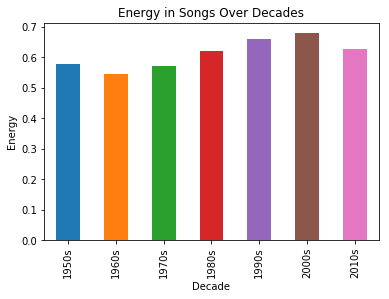

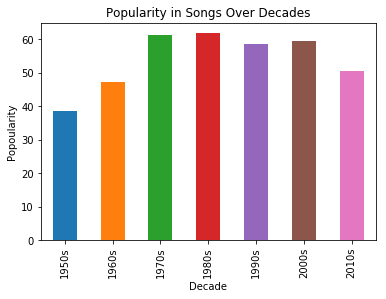

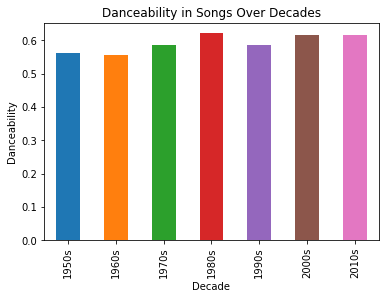

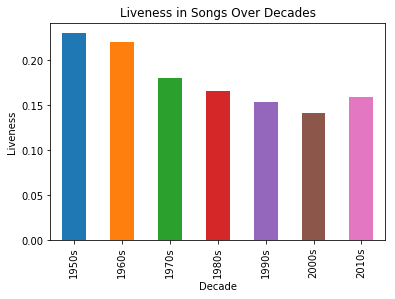

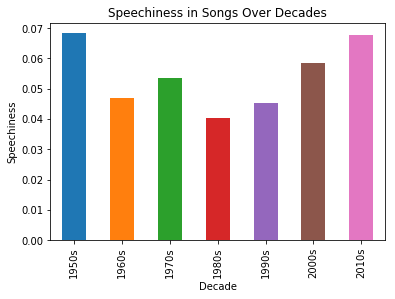

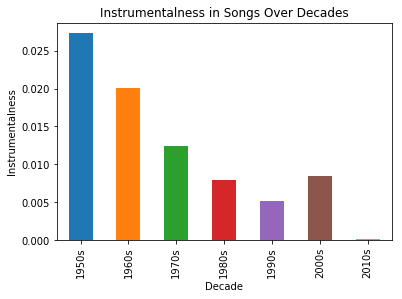

In [11]:
import seaborn as sns
decades_data['energy'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Energy')
plt.xlabel('Decade')
plt.title('Energy in Songs Over Decades')
plt.show()

decades_data['track.popularity'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Popoularity')
plt.xlabel('Decade')
plt.title('Popularity in Songs Over Decades')
plt.show()

decades_data['danceability'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Danceability')
plt.xlabel('Decade')
plt.title('Danceability in Songs Over Decades')
plt.show()

decades_data['liveness'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Liveness')
plt.xlabel('Decade')
plt.title('Liveness in Songs Over Decades')
plt.show()

decades_data['speechiness'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Speechiness')
plt.xlabel('Decade')
plt.title('Speechiness in Songs Over Decades')
plt.show()

decades_data['instrumentalness'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Instrumentalness')
plt.xlabel('Decade')
plt.title('Instrumentalness in Songs Over Decades')
plt.show()

#sns.lineplot(x="decade", y="track.popularity",data=decades_data)

In [15]:
test = decades_data['instrumentalness'].groupby(decades_data['decade']).mean().to_frame()
test["liveness"] = decades_data['liveness'].groupby(decades_data['decade']).mean()
test["energy"] = decades_data['energy'].groupby(decades_data['decade']).mean()
test["popularity"] = decades_data['track.popularity'].groupby(decades_data['decade']).mean()
test["danceability"] = decades_data['danceability'].groupby(decades_data['decade']).mean()
test["speechiness"] = decades_data['speechiness'].groupby(decades_data['decade']).mean()
test['duration_ms'] = decades_data['duration_ms'].groupby(decades_data['decade']).mean()
test

,instrumentalness,liveness,energy,popularity,danceability,speechiness,duration_ms
decade,,,,,,,
1950s,0.027316,0.230424,0.576387,38.546667,0.561560,0.068339,151532.92000
1960s,0.020058,0.220332,0.546179,47.281250,0.554896,0.047023,180736.31250
1970s,0.012393,0.180715,0.571356,61.170000,0.585250,0.053556,230476.93000
1980s,0.007967,0.166471,0.618680,61.810000,0.621320,0.040371,249941.06000
1990s,0.005138,0.153966,0.660434,58.580000,0.584380,0.045232,252328.90000
2000s,0.008492,0.142051,0.678940,59.430000,0.614930,0.058576,230432.42000
2010s,0.000090,0.159438,0.627823,50.585859,0.614848,0.067652,220046.59596


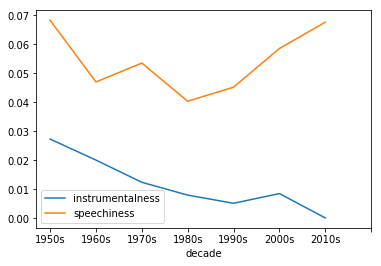

In [101]:
test.plot.line(y=['instrumentalness', 'speechiness'])
plt.xticks([0,1,2,3,4,5,6, 7], test.index.values.tolist())
plt.show()


The next image displays the popularity of each of the playlists. This does not represent the popularity of the songs during the corresponding decades but rather the popularity of them today. According to this link: https://www.statista.com/statistics/475821/spotify-users-age-usa/, about 55% of the current spotify users are between the ages of 18-34. This age group grew up with the music in the 80s, 90s, and 00s, so it makes sense that the more popular playlists are from those decades.

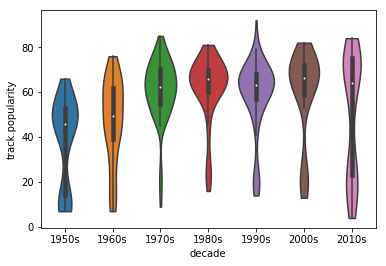

In [25]:
ax = sns.violinplot(x="decade", y="track.popularity", data=decades_data, cut = 0)
#80s and 90s were the songs we grew up with and people get nestolgic
#Most spotify users are between 18-34 so they grew up with the music from the 00s 90s and 80s. 70s is classic rockc era so
#some people like that

#speechiness vs instrumentalist
#energy got higher in last 2 decades


The following shows the distribution of energy levels of songs in each of the decades' playlists. As shown in the plot, the energy has increased from 1950 to the 2000s and 2010s.

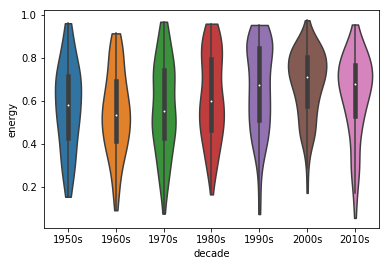

In [26]:
sns.violinplot(x="decade", y="energy", data=decades_data, cut = 0)
#energy has increased in the last 2 decades

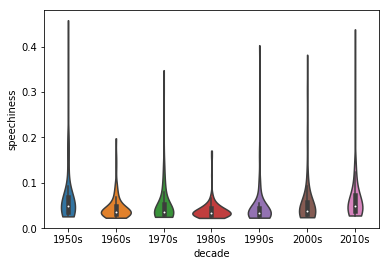

In [27]:
#Speechiness
sns.violinplot(x="decade", y="speechiness", data=decades_data, cut = 0)

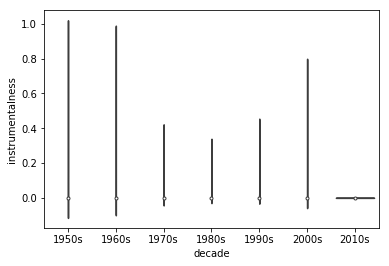

In [28]:
sns.violinplot(x="decade", y="instrumentalness", data=decades_data)

The following shows the distribution of the loudness of each the songs in each of the decades' playlists. The closer the value is to 0 the quiter it is. So as shown in the plot, the loudness has been lower the last 2 decades cmopared to the 70s and 80s. This makes perfect sense because the 70s and 80s were the times of rock music, which tended to be very loud. These decades involved music genres such as punk rock, disco, hard rock, heavy metal, alternative rock etc. 

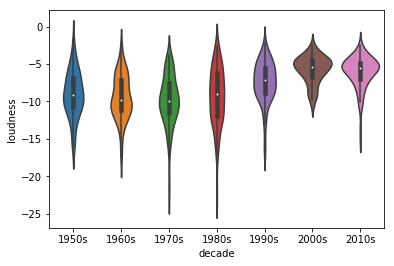

In [29]:
sns.violinplot(x="decade", y="loudness", data=decades_data)

This plot displays the valence of the songs in the decades. Valence decribes the music positivevness of a song. As Shown from the plot, the valence was much higher during the 1950s compared to today, which tends to range across the range of valence. This makes sense due the the tpes of genres during the 1950s such as rock and roll, doo-wop, pop, swing, which all tend to be very positive songs. Today, there is a range of music that can have different music positiveness depending on the subject the song is about.

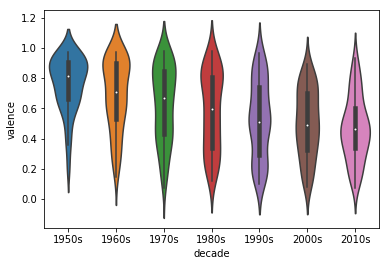

In [30]:
sns.violinplot(x="decade", y="valence", data=decades_data)
#songs were happier in the 1950s than in the 2000s and 2010s

This plot displays the danceability of the songs. Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. It shows in the plot that the danceability of the songs during each deacde has been consistent throughout the last 7 decades.

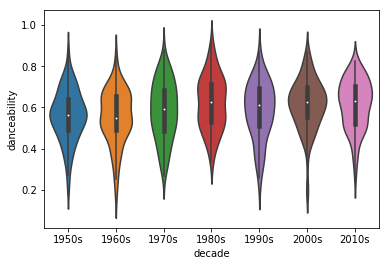

In [31]:
sns.violinplot(x="decade", y="danceability", data=decades_data)

This plot displays the tempo distribution in the songs for each decade playlist. The overall estimated tempo of a track in beats per minute (BPM). As expected, the 1950s has more songs that had a higher tempo, which is due to the high spirited genres of that time. After that decade, the distribution of the tempo in the playlist tend to be quite consistent.

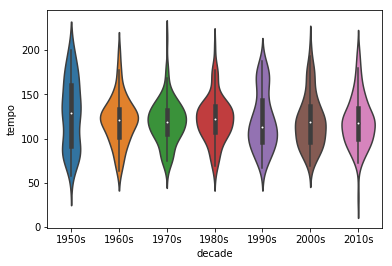

In [32]:
sns.violinplot(x="decade", y="tempo", data=decades_data)

This plot displays the duration in miliseconds of the songs for each decade. This plot shows that there were many more long songs during the 60s and 70s, which makes sense due to the type of music during the time. There were more songs in the 60s and 70s that exceeded the normal average of 3-4 minutes long compared to today where there is rarely a song that exceeds 5 minutes.

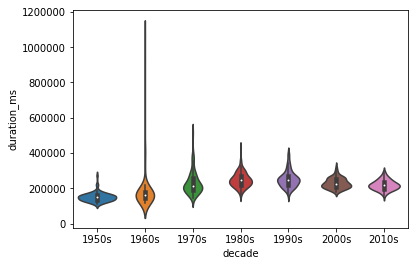

In [33]:
sns.violinplot(x="decade", y="duration_ms", data=decades_data)
#longer somgs during 60s, 70s, 80s

In [34]:
decades_data

,name,track.id,track.duration_ms,added_at,track.popularity,track.name,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,decade
74,Johnny Burnette,5HEDjLbZzujPv6xiylsCQ2,118333,2018-10-02T00:00:48Z,7,You're Sixteen-Your're Beautiful (And You're M...,0.30400,0.419,118333,0.449,5HEDjLbZzujPv6xiylsCQ2,0.000003,2,0.0725,-9.946,0.0533,76.322,4,0.756,1950s
73,Sam Cooke,1uaHZMJyULGDBiNa9pk3FV,173026,2018-10-02T00:00:48Z,8,You Send Me,0.91500,0.574,173027,0.250,1uaHZMJyULGDBiNa9pk3FV,0.000000,4,0.1460,-10.307,0.0276,96.740,4,0.443,1950s
72,Lee Dorsey,2pMwweGkjNLXZkSDZ63LYf,146053,2018-10-02T00:00:48Z,48,Ya Ya,0.60700,0.758,146053,0.557,2pMwweGkjNLXZkSDZ63LYf,0.000218,5,0.1930,-10.106,0.0453,140.795,4,0.887,1950s
71,Frankie Lymon & The Teenagers,6vL5Kx5LmZzcL12DZl2OiY,138973,2018-10-02T00:00:48Z,52,Why Do Fools Fall in Love,0.61700,0.439,138973,0.458,6vL5Kx5LmZzcL12DZl2OiY,0.000060,1,0.1210,-9.906,0.0675,174.147,4,0.866,1950s
70,Jerry Lee Lewis,6wO13Xb3EdHUNixFOEJ0KV,172400,2018-10-02T00:00:48Z,58,Whole Lot of Shakin' Going On,0.83200,0.377,172400,0.626,6wO13Xb3EdHUNixFOEJ0KV,0.000065,0,0.1880,-9.662,0.0330,161.468,4,0.678,1950s
69,Frankie Lymon & The Teenagers,6pqleSjOGb4XP9tjU7IwCv,179466,2018-10-02T00:00:48Z,42,Who Put The Bomp (In The Bomp Bomp Bomp) - 200...,0.60300,0.582,179467,0.517,6pqleSjOGb4XP9tjU7IwCv,0.000000,5,0.3020,-9.325,0.0367,83.682,4,0.833,1950s
68,The Everly Brothers,7mVbL1b8HC1rW4Jle6ypG3,123000,2018-10-02T00:00:48Z,45,Wake Up Little Susie - 2006 Remastered Version,0.23800,0.741,123000,0.666,7mVbL1b8HC1rW4Jle6ypG3,0.000000,2,0.3120,-6.878,0.0326,93.686,4,0.941,1950s
67,The Drifters,5eh0402zJwaohvhArtKhQ4,157640,2018-10-02T00:00:48Z,53,Under the Boardwalk,0.66600,0.726,157640,0.356,5eh0402zJwaohvhArtKhQ4,0.000000,7,0.1520,-10.091,0.0399,123.885,4,0.750,1950s
66,Little Richard,3Os0VNtvEnRFlXSK5dvOFu,146640,2018-10-02T00:00:48Z,10,Tutti Frutti,0.78200,0.532,146640,0.591,3Os0VNtvEnRFlXSK5dvOFu,0.000000,0,0.0647,-3.810,0.0591,184.400,4,0.962,1950s
65,The Five Satins,5VyJGb6l6rY8bBZH2RC6XD,165866,2018-10-02T00:00:48Z,45,To The Aisle,0.91000,0.323,165867,0.273,5VyJGb6l6rY8bBZH2RC6XD,0.000000,5,0.1000,-10.152,0.0355,194.882,3,0.547,1950s


In [73]:
def decades_song(songs_arr, artist_arr):
    lyr = []
    for song, artist in zip(songs_arr, artist_arr):
        url = request_song_info(song, artist)
        #print("URL: "+url)
        if url is not "": 
            stop_words, lyrics = get_cleaned_lyrics(url)
            lyr += lyrics
           
    return stop_words, lyr

# trying to get song lyrics
def request_song_info(song_title, artist_name):
    base_url = 'https://api.genius.com'
    headers = {'Authorization': 'Bearer ' + genius_token}
    search_url = base_url + '/search'
    data = {'q': song_title + ' ' + artist_name}
    response = requests.get(search_url, data=data, headers=headers) # making the get request
    json = response.json()
    remote_song_info = None
     
    for hit in json['response']['hits']: #using the artist name to make sure we're actually getting the song we want
        if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
            remote_song_info = hit
            break
        
    if remote_song_info:     # Extract lyrics from URL if the song was found
        song_url = remote_song_info['result']['url']
        return song_url
    else:
        return ""

def get_cleaned_lyrics(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, 'html.parser')
    lyrics = html.find('div', class_='lyrics').get_text()
    tokens = word_tokenize(lyrics)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    stop_words.add("chorus")
    stop_words.add("verse")
    stop_words.add("nt")

    words = [w for w in words if not w in stop_words]
    return stop_words, words

def generate_wordcloud(words):
    wordcloud = WordCloud().generate(words)
    return wordcloud

def display_wordcloud(wordcloud):
    # Generate a word cloud image
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [76]:
decades_group = decades_data.groupby("decade")
decade_lyrics = {}
for name, group in decades_group:
    print("==========")
    #print(group["name"])
    stop_words, lyr = decades_song(group["track.name"], group["name"])
    decade_lyrics[name] = " ".join(lyr)
    # want to aggregate all of the lyrics for a decade



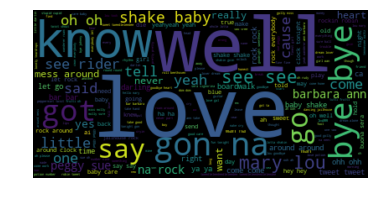

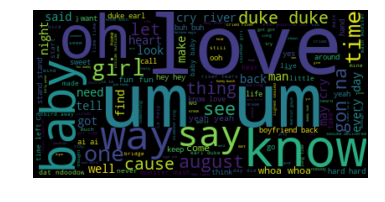

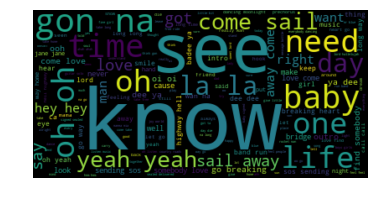

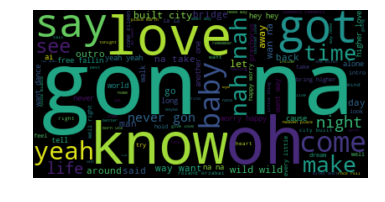

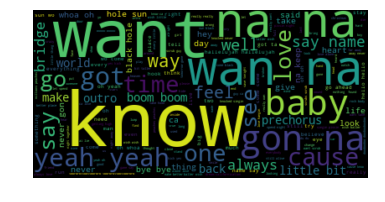

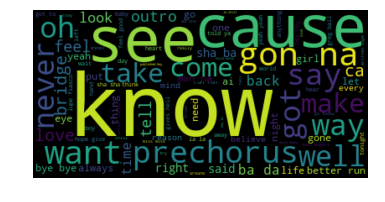

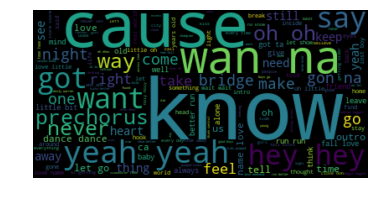

In [77]:
for key, value in decade_lyrics.items():
    display_wordcloud(generate_wordcloud(value))
